# 第6章　使用 `scikit-learn` 构建模型

## 任务6.3　构建并评价分类模型

<br>
<center>
    <b>代码6-17　使用<code>sklearn</code>估计器构建<code>SVM</code>模型</b>
</center>

In [1]:
import numpy
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_names = cancer['feature_names']
(cancer_data_train, cancer_data_test, cancer_target_train, cancer_target_test) = train_test_split(
    cancer_data, cancer_target, test_size=0.2, random_state=22
)
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)
svm = SVC().fit(cancer_trainStd, cancer_target_train)
print('建立的SVM模型为：', svm, sep='\n')

建立的SVM模型为：
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [2]:
cancer_target_pred = svm.predict(cancer_testStd)
print('预测前20个结果为；', cancer_target_pred[:20])

预测前20个结果为； [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]


<br>
<center>
    <b>代码6-18　分类结果的混淆矩阵与准确率</b>
</center>

In [3]:
true = numpy.sum(cancer_target_pred == cancer_target_test)
print('预测正确的结果数据为：', true)
print('预测错误的结果数目为：', cancer_target_test.shape[0] - true)
print('预测结果准确率为：', true / cancer_target_test.shape[0])

预测正确的结果数据为： 111
预测错误的结果数目为： 3
预测结果准确率为： 0.9736842105263158


<br>
<center>
    <b>代码6-19　分类模型常用评价方法</b>
</center>

In [4]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
)
print('使用SVM预测乳腺癌数据的准确率为：', accuracy_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测乳腺癌数据的精确率为：', precision_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测乳腺癌数据的召回率为：', recall_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测乳腺癌数据的F1值为：', f1_score(cancer_target_test, cancer_target_pred))
print('使用SVM预测乳腺癌数据的Kappa系数为：', cohen_kappa_score(cancer_target_test, cancer_target_pred))

使用SVM预测乳腺癌数据的准确率为： 0.9736842105263158
使用SVM预测乳腺癌数据的精确率为： 0.9594594594594594
使用SVM预测乳腺癌数据的召回率为： 1.0
使用SVM预测乳腺癌数据的F1值为： 0.9793103448275862
使用SVM预测乳腺癌数据的Kappa系数为： 0.9432082364662903


<br>
<center>
    <b>代码6-20　分类模型评估报告</b>
</center>

In [5]:
from sklearn.metrics import classification_report
print(
    '使用SVM预测乳腺癌数据的分类报告为：',
    classification_report(cancer_target_test, cancer_target_pred),
    sep='\n'
)

使用SVM预测乳腺癌数据的分类报告为：
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<br>
<center>
    <b>代码6-21　绘制<code>ROC</code>曲线</b>
</center>

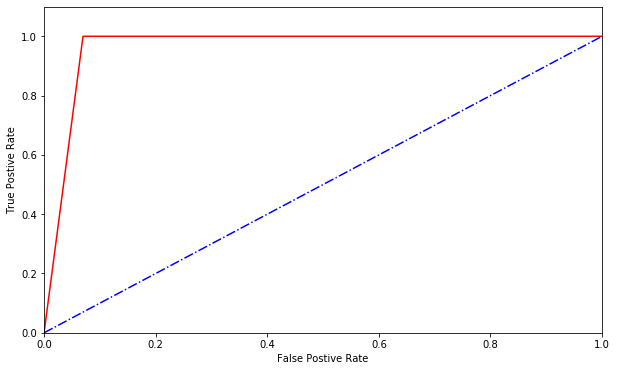

In [6]:
%matplotlib inline
from sklearn.metrics import roc_curve
from matplotlib import pyplot
(fpr, tpr, thresholds) = roc_curve(cancer_target_test, cancer_target_pred)
pyplot.figure(figsize=(10, 6))
pyplot.xlim(0, 1)
pyplot.ylim(0, 1.1)
pyplot.xlabel('False Postive Rate')
pyplot.ylabel('True Postive Rate')
pyplot.plot(
    fpr, tpr, 'r-', [0, 1], [0, 1], 'b-.'
)
pyplot.savefig('img/ROC曲线.svg')
pyplot.show()

<br>
<center>
    <b>代码6-22　鲍鱼年龄预测</b>
</center>

In [7]:
import pandas
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
abalone = pandas.read_csv('data/abalone.data', sep=',', encoding='gbk')
# 拆分标签与数据
abalone_data = abalone.iloc[:, :8]
abalone_target = abalone.iloc[:, 8]
# 哑变量处理
sex = pandas.get_dummies(abalone_data['sex'])
abalone_data = pandas.concat([abalone_data, sex], axis=1)
abalone_data.drop('sex', axis=1, inplace=True)
# 划分训练集、测试集
(abalone_train, abalone_test, abalone_target_train, abalone_target_test) = train_test_split(
    abalone_data, abalone_target, train_size=0.8, random_state=42
)
# 标准化
stdScaler = StandardScaler().fit(abalone_train)
abalone_std_train = stdScaler.transform(abalone_train)
abalone_std_test = stdScaler.transform(abalone_test)
# 建模
svm_abalone = SVC().fit(abalone_std_train, abalone_target_train)
print('建立的SVM模型为：', svm_abalone, sep='\n')

建立的SVM模型为：
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


<br>
<center>
    <b>代码6-23　评价构建的<code>SVM</code>分类模型</b>
</center>

In [8]:
abalone_target_pred = svm_abalone.predict(abalone_std_test)
print('鲍鱼年龄数据集的SVM分类报告为：', classification_report(abalone_target_test, abalone_target_pred))

鲍鱼年龄数据集的SVM分类报告为：               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.45      0.69      0.55        13
           5       0.54      0.22      0.31        32
           6       0.40      0.33      0.36        48
           7       0.41      0.44      0.42        84
           8       0.37      0.36      0.37        99
           9       0.28      0.57      0.38       142
          10       0.24      0.33      0.28       139
          11       0.25      0.25      0.25        93
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
         

C:\Users\legen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
